## ........................................Rental property analysis in Germany..............................................
## Task 5 - Machine Learning - Clustering

#### 1.Import Libraries
#### 2.Import Data
#### 3.Data Cleaning
#### 4.The elbow technique
#### 5.K-means Clustering

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Import Data

In [3]:
# create path
path = r"C:\Users\ponni\Achievement 6"

In [4]:
# Import original data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'immodata_new7.csv'), index_col = False)

# 3. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209079 entries, 0 to 209078
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        209079 non-null  int64  
 1   State             209079 non-null  object 
 2   City              209079 non-null  object 
 3   Pincode           209079 non-null  int64  
 4   Year_constructed  209079 non-null  int64  
 5   Rent              209079 non-null  float64
 6   Base_rent         209079 non-null  float64
 7   Maintenance_fee   209079 non-null  float64
 8   Area(m2)          209079 non-null  float64
 9   Rooms             209079 non-null  int64  
 10  Heating_type      209079 non-null  object 
 11  House_condition   209079 non-null  object 
 12  TV_offer          209079 non-null  object 
 13  Newly_built       209079 non-null  bool   
 14  Balcony           209079 non-null  bool   
 15  Picture_count     209079 non-null  int64  
 16  Price_trend       20

#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Floor', axis=1, inplace=True)

In [13]:
#Removing unnecessary column
df.drop('State', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)
df.drop('Pincode', axis=1, inplace=True)
df.drop('Heating_type', axis=1, inplace=True)
df.drop('House_condition', axis=1, inplace=True)
df.drop('TV_offer', axis=1, inplace=True)
df.drop('Kitchen', axis=1, inplace=True)
df.drop('Newly_built', axis=1, inplace=True)
df.drop('Balcony', axis=1, inplace=True)
df.drop('Cellar', axis=1, inplace=True)
df.drop('Lift', axis=1, inplace=True)
df.drop('Flat_type', axis=1, inplace=True)
df.drop('Garden', axis=1, inplace=True)
df.drop('Rent_range', axis=1, inplace=True)

In [14]:
df.head()

,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Picture_count,Price_trend,Price_per_m2
0,1965,840.00,595.0,245.00,86.00,4,6,4.62,6.918605
1,1871,934.00,800.0,134.00,89.00,3,8,3.47,8.988764
2,2019,1220.00,965.0,255.00,83.80,3,8,2.72,11.515513
3,1964,401.15,343.0,58.15,58.15,3,9,1.53,5.898538
4,1950,903.00,765.0,138.00,84.97,3,19,2.46,9.003178


In [15]:
df.shape

(209079, 9)

# 4.The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-129240303606.8145,
 -58051121676.23513,
 -34365504746.193794,
 -23172224667.99613,
 -16873433434.479113,
 -13248033976.31181,
 -10406044887.276985,
 -8463299550.610665,
 -7106698675.839948]

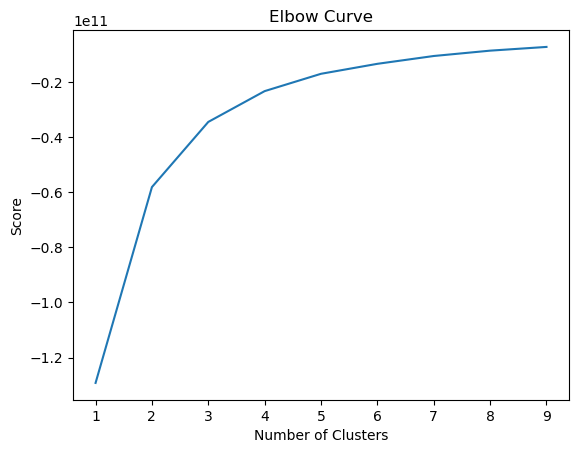

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a large jump from 2 to 3 on the x-axis. This means that the optimal count for clusters is 3.

# 5. K-means Clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [22]:
df['clusters'] = kmeans.fit_predict(df)

In [23]:
df.head()

,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Picture_count,Price_trend,Price_per_m2,clusters
0,1965,840.00,595.0,245.00,86.00,4,6,4.62,6.918605,0
1,1871,934.00,800.0,134.00,89.00,3,8,3.47,8.988764,2
2,2019,1220.00,965.0,255.00,83.80,3,8,2.72,11.515513,2
3,1964,401.15,343.0,58.15,58.15,3,9,1.53,5.898538,0
4,1950,903.00,765.0,138.00,84.97,3,19,2.46,9.003178,0


In [24]:
df['clusters'].value_counts()

0    152295
2     51525
1      5259
Name: clusters, dtype: int64

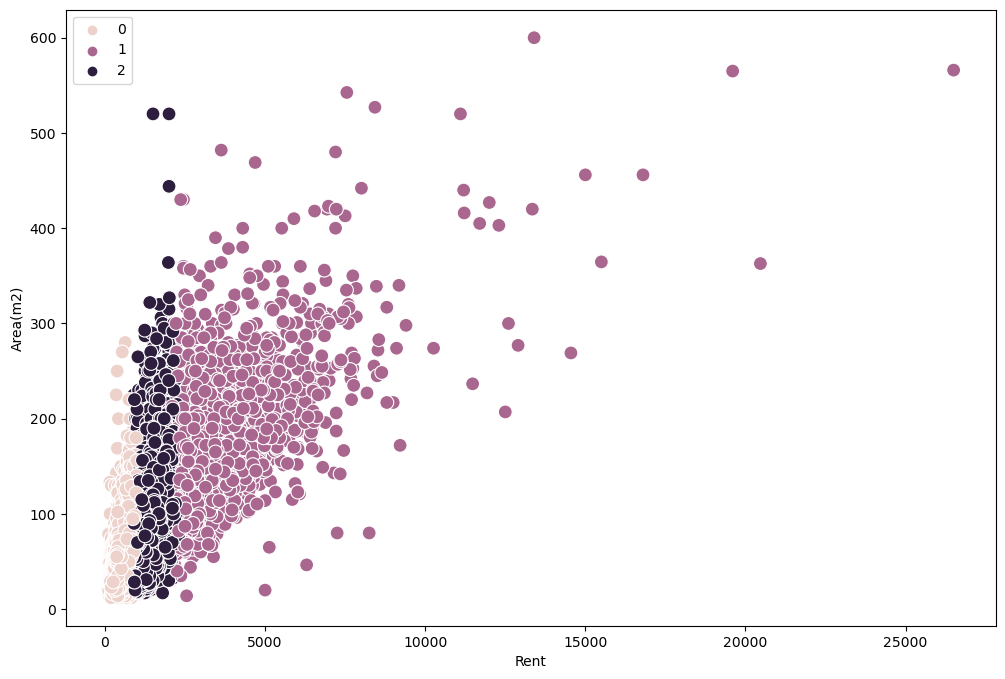

In [25]:
# Plot the clusters for the "Rent" and "Area(m2)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rent'], y=df['Area(m2)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rent') # Label x-axis.
plt.ylabel('Area(m2)') # Label y-axis.
plt.show()

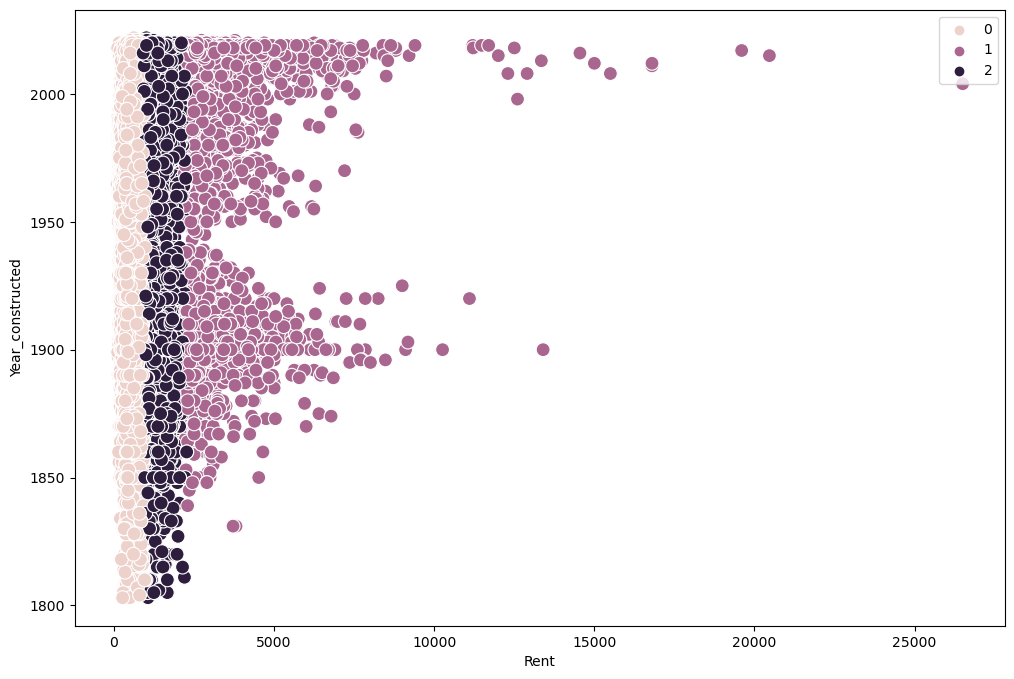

In [26]:
# Plot the clusters for the "Rent" and "Year_constructed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rent'], y=df['Year_constructed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rent') 
plt.ylabel('Year_constructed') 
plt.show()

In [27]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [30]:
df.groupby('cluster').agg({'Rent':['mean', 'median'], 
                         'Price_trend':['mean', 'median'], 
                         'Area(m2)':['mean', 'median'],
                           'Rooms':['mean', 'median'],
                           'Maintenance_fee':['mean', 'median'],
                          'Price_per_m2':['mean', 'median']})

Rent         Price_trend           Area(m2)         \
                    mean  median        mean median        mean median   
cluster                                                                  
dark purple  1334.284393  1255.0    4.496909   4.41   99.357448   96.0   
pink          547.518573   519.0    2.934351   3.02   62.225267   61.0   
purple       3103.950221  2725.0    5.528964   5.37  156.684626  147.5   

                Rooms        Maintenance_fee        Price_per_m2             
                 mean median            mean median         mean     median  
cluster                                                                      
dark purple  3.104551    3.0      209.047632  200.0    12.246840  11.018143  
pink         2.371142    2.0      120.954880  120.0     7.171200   6.388889  
purple       3.801673    4.0      380.033999  355.0    18.521203  17.133956

#### The purple cluster has the best stats in almost all categories. The Rent for the purple category is high and its price trend seems to be increasing. The maintenance fee is also high for this category.